# 02 - Data Preparation
* (1) 

In [21]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
import utils
from constants import Constants

In [2]:
# Get a list of all accelerometer files
all_files = utils.get_all_files()

# Load one accelerometer data file into dataframe
load_id = 0     # Load the first CSV file from the file list 
file_id, df = utils.load_single_data(all_files, load_id)

# Setup paramters
fs = Constants.fs

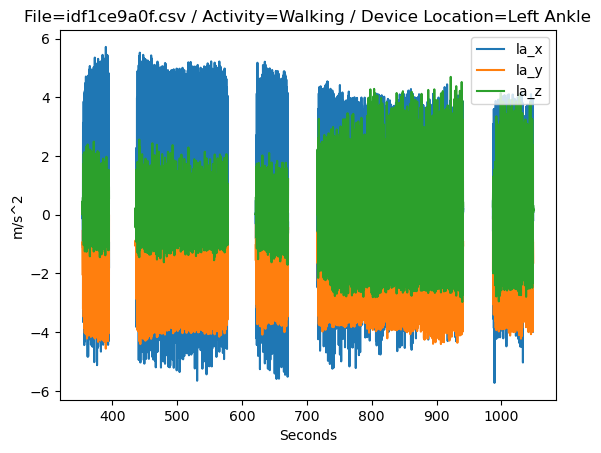

In [4]:
device_location = 'la'
activity = 1         # plot Activity=1 (Walking)

utils.plot_zoomin(file_id, df, activity, device_location)

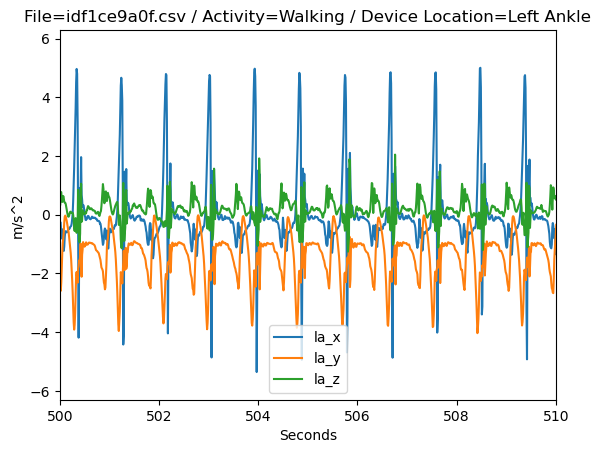

In [5]:
device_location = 'la'
activity = 1         # plot Activity=1 (Walking)
t0 = 500               # Begin second of the zoom-in plot
t1 = 510            # End second of the zoom-in plot

utils.plot_zoomin(file_id, df, activity, device_location, t0, t1)

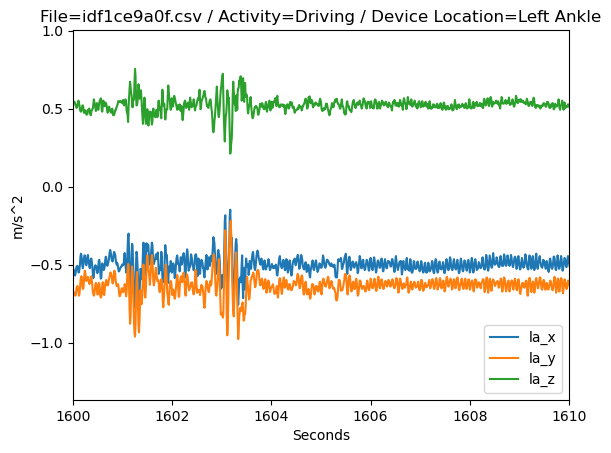

In [27]:
device_location = 'la'
activity = 4         # plot Activity=1 (Walking)
t0 = 1600               # Begin second of the zoom-in plot
t1 = 1610            # End second of the zoom-in plot

utils.plot_zoomin(file_id, df, activity, device_location, t0, t1)

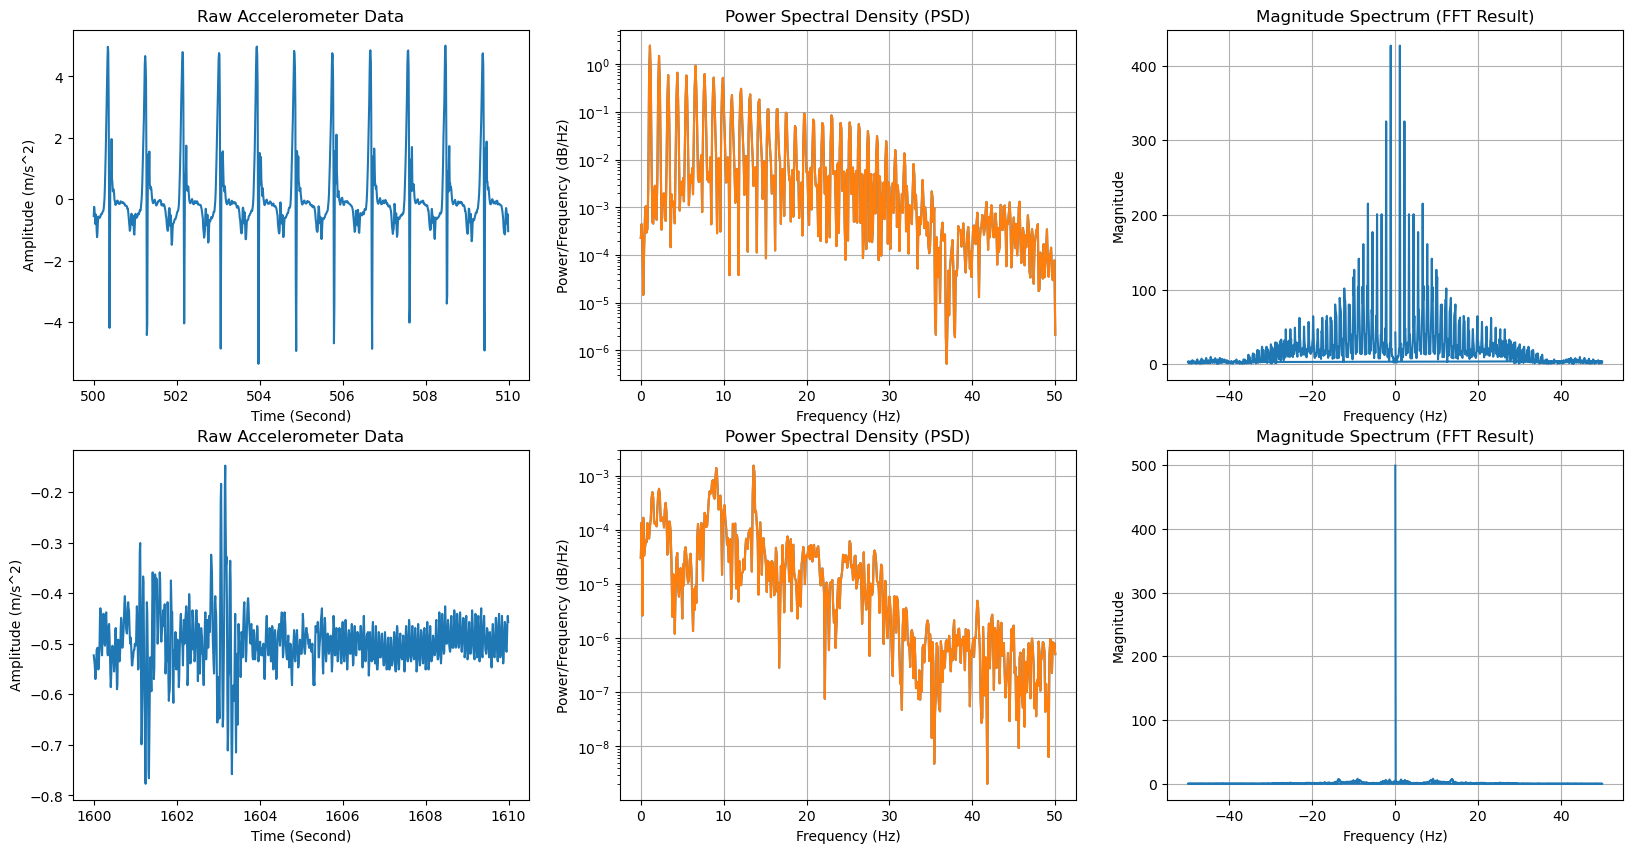

In [32]:
'''
Use frequency analysis to obtain steps counts
'''
def compute_psd(signal_data, fs=fs):    
    # Compute power spectral density using Welch's method
    nperseg = 1024   # Set default as 1024; will use a smaller value if the input signal has fewer points 
    frequencies, psd = signal.welch(signal_data, fs, nperseg=min(nperseg, len(signal_data)))
    return frequencies, psd

def compute_fft(signal_data, fs=fs):
    fft_result = fft(signal_data)
    freq = fftfreq(len(signal_data), 1/fs)
    return freq, fft_result

def cut_data(df, device_location, activity, t0, t1):
    # Prepare 10-sec Walking data from Left ankle
    df2 = df[df.activity==activity]                      # Select Activity
    df2_cut = df2[(df2.time_s>=t0) & (df2.time_s<t1)]    # Cut to a segment
    loc_x = device_location+'_x'
    loc_y = device_location+'_y'
    loc_z = device_location+'_z'
    signal_data_t = df2_cut.time_s
    signal_data_x = df2_cut[loc_x]
    signal_data_y = df2_cut[loc_y]
    signal_data_z = df2_cut[loc_z]
    return signal_data_t, signal_data_x, signal_data_y, signal_data_z

# Begin to plot
plt.figure(figsize=(20, 10))

# Data for Walking
device_location = 'la'  # left Ankle
activity = 1            # 1: Walking
t0 = 500
t1 = 510
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, device_location, activity, t0, t1)

plt.subplot(2,3,1)
plt.plot(signal_data_t, signal_data_x)
plt.title('Raw Accelerometer Data')
plt.xlabel('Time (Second)')
plt.ylabel('Amplitude (m/s^2)')

plt.subplot(2,3,2)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data_x, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.subplot(2,3,3)
# Apply FFT
freq, fft_result = compute_fft(signal_data_x.values, fs=fs)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum (FFT Result)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)


# # Data for Driving
device_location = 'la'  # left Ankle
activity = 4            # 4: Driving
t0 = 1600
t1 = 1610
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, device_location, activity, t0, t1)

plt.subplot(2,3,4)
plt.plot(signal_data_t, signal_data_x)
plt.title('Raw Accelerometer Data')
plt.xlabel('Time (Second)')
plt.ylabel('Amplitude (m/s^2)')

plt.subplot(2,3,5)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data_x, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.subplot(2,3,6)
# Apply FFT
freq, fft_result = compute_fft(signal_data_x.values, fs=fs)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum (FFT Result)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

In [34]:
'''
Apply filtering to remove target frequency range
'''
s=1

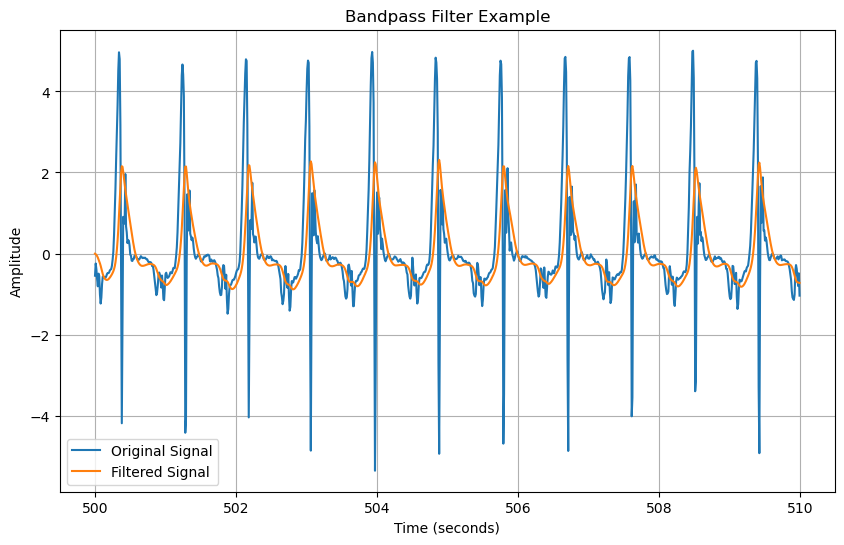

In [57]:
device_location = 'la'  # left Ankle
activity = 1            # 1: Walking
t0 = 500
t1 = 510
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, device_location, activity, t0, t1)

t = signal_data_t
signal = signal_data_x
# Design and apply bandpass filter
lowcut  = 1  # Lower cutoff frequency
highcut = 30.0  # Upper cutoff frequency
order = 2      # Filter order

filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.title('Bandpass Filter Example')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

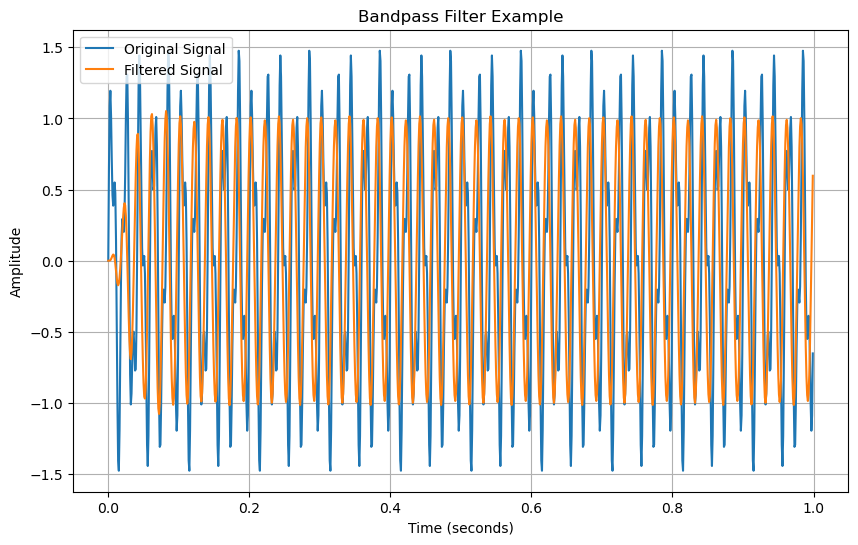

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Function to design a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the bandpass filter to a signal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample data
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# Design and apply bandpass filter
lowcut = 40.0  # Lower cutoff frequency
highcut = 80.0  # Upper cutoff frequency
order = 4      # Filter order

filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.title('Bandpass Filter Example')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
